In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import src.stockPriceToolkit as spt 
# import src.macroEconomicsToolkit as et

In [8]:
property_data = pd.read_csv("input_data/property locations.csv")
property_data.head()

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,NumFloors,PropertyStatus,ImpressionRating,LocationRating,CompletionDate
0,720 Self Storage,720 6th Avenue,Troy,NY,12182.0,5.182337e+09,17769.0,15103.0,1.91,3.0,2,Completed,B,C+,1970-01-01
1,A - Metro Climate Controlled Self Storage,4773 Western Turnpike,Altamont,NY,12009.0,5.183579e+09,44268.0,42054.0,10.60,6.0,1,Completed,B,B-,2013-01-01
2,A - Metro Movers Self Storage,889 Troy-Schenectady Road,Latham,NY,12110.0,5.187834e+09,43069.0,36608.0,5.70,6.0,2,Completed,B,B,1989-01-01
3,A - Metro Movers Self Storage,2703 Curry Road,Guilderland,NY,12303.0,5.183555e+09,37125.0,31556.0,4.55,2.0,2,Completed,B,B-,2011-01-01
4,Accessible Self Storage,1233 Route 9,Hudson,NY,12534.0,5.188221e+09,10900.0,10355.0,17.40,4.0,1,Completed,C,C,2000-01-01


In [9]:
# convert CompletionDate to datetime
property_data.CompletionDate = pd.to_datetime(property_data.CompletionDate, format='%Y-%m-%d')
property_data.head()

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,NumFloors,PropertyStatus,ImpressionRating,LocationRating,CompletionDate
0,720 Self Storage,720 6th Avenue,Troy,NY,12182.0,5.182337e+09,17769.0,15103.0,1.91,3.0,2,Completed,B,C+,1970-01-01
1,A - Metro Climate Controlled Self Storage,4773 Western Turnpike,Altamont,NY,12009.0,5.183579e+09,44268.0,42054.0,10.60,6.0,1,Completed,B,B-,2013-01-01
2,A - Metro Movers Self Storage,889 Troy-Schenectady Road,Latham,NY,12110.0,5.187834e+09,43069.0,36608.0,5.70,6.0,2,Completed,B,B,1989-01-01
3,A - Metro Movers Self Storage,2703 Curry Road,Guilderland,NY,12303.0,5.183555e+09,37125.0,31556.0,4.55,2.0,2,Completed,B,B-,2011-01-01
4,Accessible Self Storage,1233 Route 9,Hudson,NY,12534.0,5.188221e+09,10900.0,10355.0,17.40,4.0,1,Completed,C,C,2000-01-01


In [10]:
property_data["Week"] = property_data.CompletionDate.apply(lambda x: x.week)
property_data["Year"] = property_data.CompletionDate.apply(lambda x: x.year)
property_data["Month"] = property_data.CompletionDate.apply(lambda x: x.month)
property_data['quarter'] = property_data.CompletionDate.apply(lambda x: x.quarter)

property_data.head()

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,NumFloors,PropertyStatus,ImpressionRating,LocationRating,CompletionDate,Week,Year,Month,quarter
0,720 Self Storage,720 6th Avenue,Troy,NY,12182.0,5.182337e+09,17769.0,15103.0,1.91,3.0,2,Completed,B,C+,1970-01-01,1.0,1970.0,1.0,1.0
1,A - Metro Climate Controlled Self Storage,4773 Western Turnpike,Altamont,NY,12009.0,5.183579e+09,44268.0,42054.0,10.60,6.0,1,Completed,B,B-,2013-01-01,1.0,2013.0,1.0,1.0
2,A - Metro Movers Self Storage,889 Troy-Schenectady Road,Latham,NY,12110.0,5.187834e+09,43069.0,36608.0,5.70,6.0,2,Completed,B,B,1989-01-01,52.0,1989.0,1.0,1.0
3,A - Metro Movers Self Storage,2703 Curry Road,Guilderland,NY,12303.0,5.183555e+09,37125.0,31556.0,4.55,2.0,2,Completed,B,B-,2011-01-01,52.0,2011.0,1.0,1.0
4,Accessible Self Storage,1233 Route 9,Hudson,NY,12534.0,5.188221e+09,10900.0,10355.0,17.40,4.0,1,Completed,C,C,2000-01-01,52.0,2000.0,1.0,1.0


In [11]:
# Filter property data for CompletionDate >= 1972 when Public Storage business started 
property_data = property_data[property_data["Year"] >= 1972]
property_data["LocationRating"] = property_data["LocationRating"].apply(lambda x: x.strip())
property_data["ImpressionRating"] = property_data["ImpressionRating"].apply(lambda x: x.strip())
property_data.head()

,PropertyName,Address,City,State,ZipCode,PhoneNumber,TotalSqFt,NetRentableSqFt,TotalAcres,NumBuildings,NumFloors,PropertyStatus,ImpressionRating,LocationRating,CompletionDate,Week,Year,Month,quarter
1,A - Metro Climate Controlled Self Storage,4773 Western Turnpike,Altamont,NY,12009.0,5.183579e+09,44268.0,42054.0,10.60,6.0,1,Completed,B,B-,2013-01-01,1.0,2013.0,1.0,1.0
2,A - Metro Movers Self Storage,889 Troy-Schenectady Road,Latham,NY,12110.0,5.187834e+09,43069.0,36608.0,5.70,6.0,2,Completed,B,B,1989-01-01,52.0,1989.0,1.0,1.0
3,A - Metro Movers Self Storage,2703 Curry Road,Guilderland,NY,12303.0,5.183555e+09,37125.0,31556.0,4.55,2.0,2,Completed,B,B-,2011-01-01,52.0,2011.0,1.0,1.0
4,Accessible Self Storage,1233 Route 9,Hudson,NY,12534.0,5.188221e+09,10900.0,10355.0,17.40,4.0,1,Completed,C,C,2000-01-01,52.0,2000.0,1.0,1.0
5,Accountable Self Storage,4071 Route 9,Hudson,NY,12534.0,5.188220e+09,8100.0,7695.0,5.06,2.0,1,Completed,C,C,1999-01-01,53.0,1999.0,1.0,1.0


In [12]:
state_lat_long = pd.read_csv("input_data/state_lat_long.csv")
state_lat_long.head()

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


### UNI-VARIATE ANALYSIS
1. NetRentableSqFt distribution -> boxplots, prob density
2. NumBuildings -> boxplots, prob density
3. NumFloors -> boxplots
4. TotalSqFt -> boxplots, prob dencsity
5. ImpressionRating -> Bar Chart
6. LocationRating -> Bar Chart

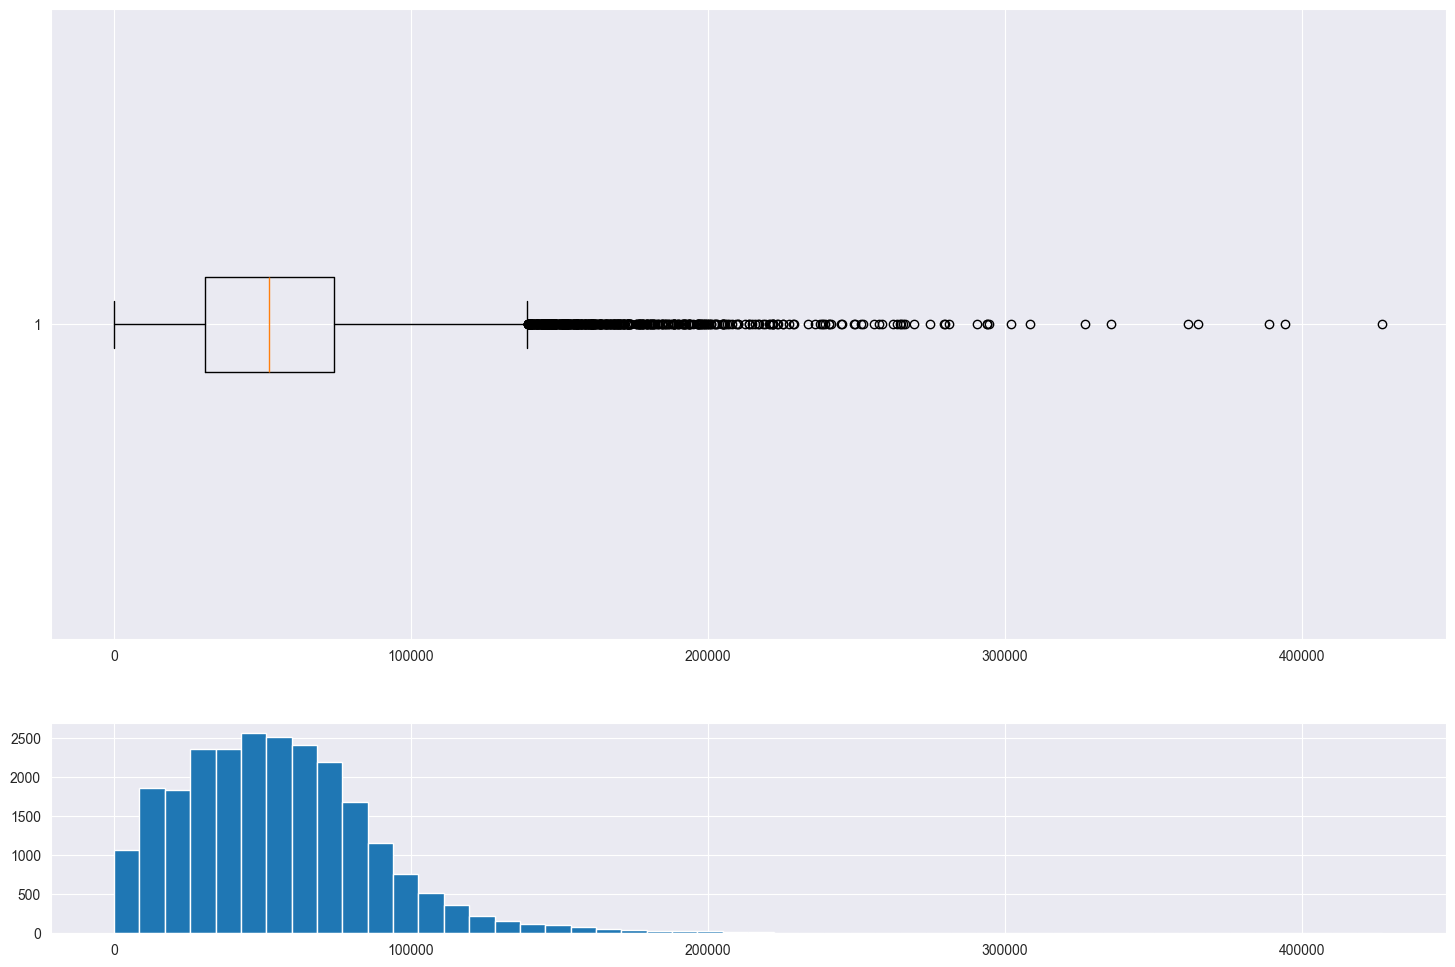

In [21]:
### UNI-VARIATE ANALYSIS
# 1. NetRentableSqFt distribution -> boxplots, prob density
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(property_data["NetRentableSqFt"].dropna(), vert=False, meanline=True)
ax2.hist(property_data["NetRentableSqFt"].dropna(), bins=50)
plt.show()

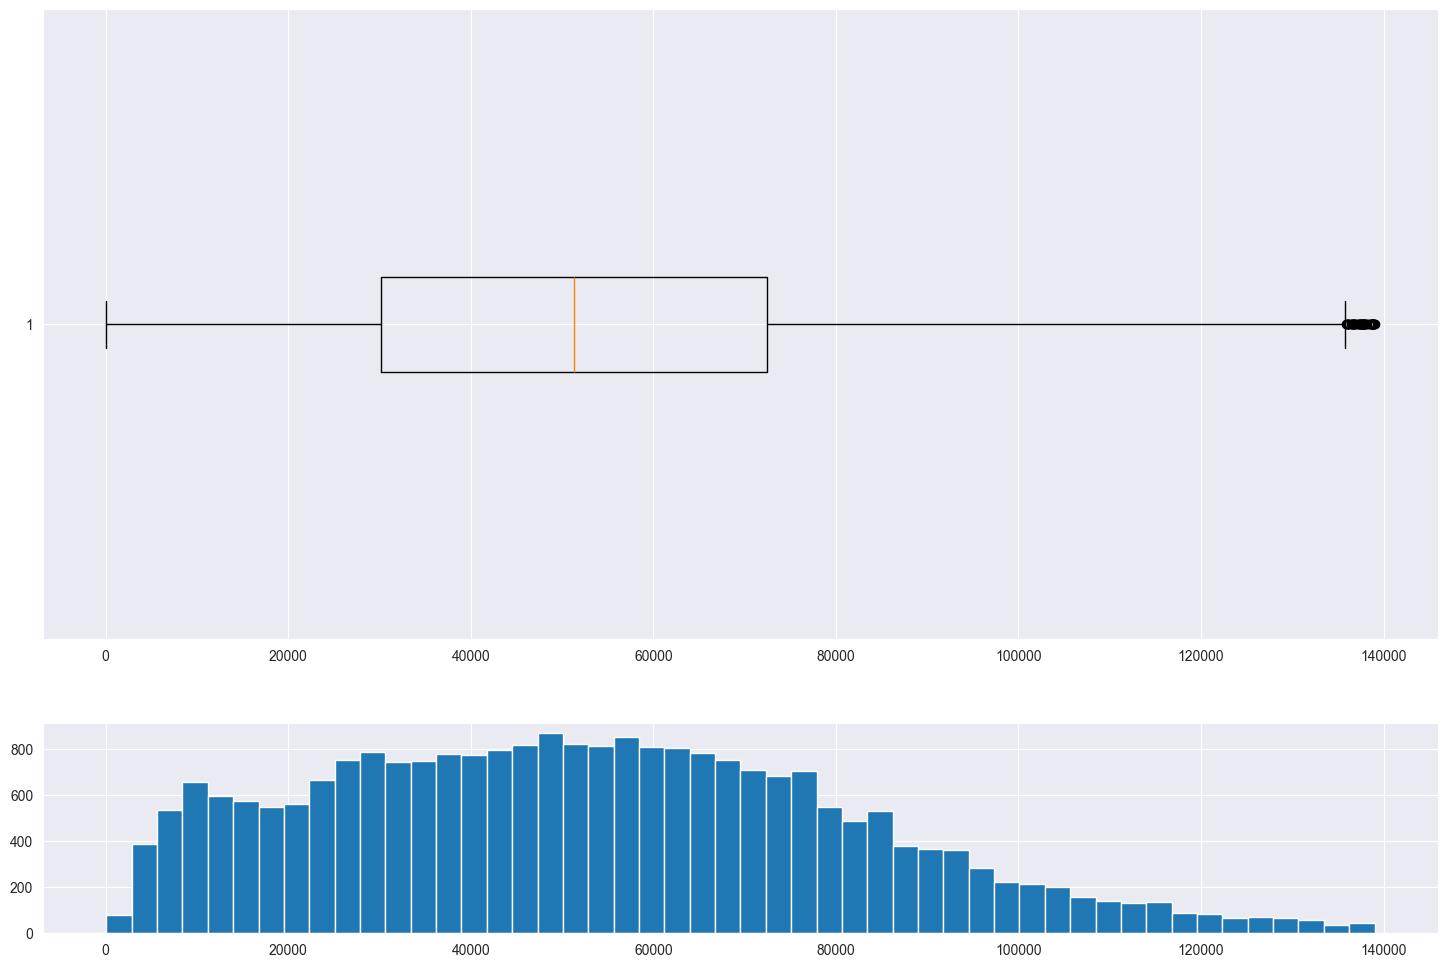

In [22]:
### UNI-VARIATE ANALYSIS
# 1. NetRentableSqFt distribution -> boxplots, prob density
# Calculate the IQR (Interquartile Range) and remove the outliers in property data based on NetRentableSqFt
col = "NetRentableSqFt"

Q1 = property_data[col].quantile(0.25)
Q3 = property_data[col].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

property_data = property_data[(property_data[col] >= lower_bound) & (property_data[col] <= upper_bound)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(property_data[col].dropna(), vert=False, meanline=True)
ax2.hist(property_data[col].dropna(), bins=50)
plt.show()

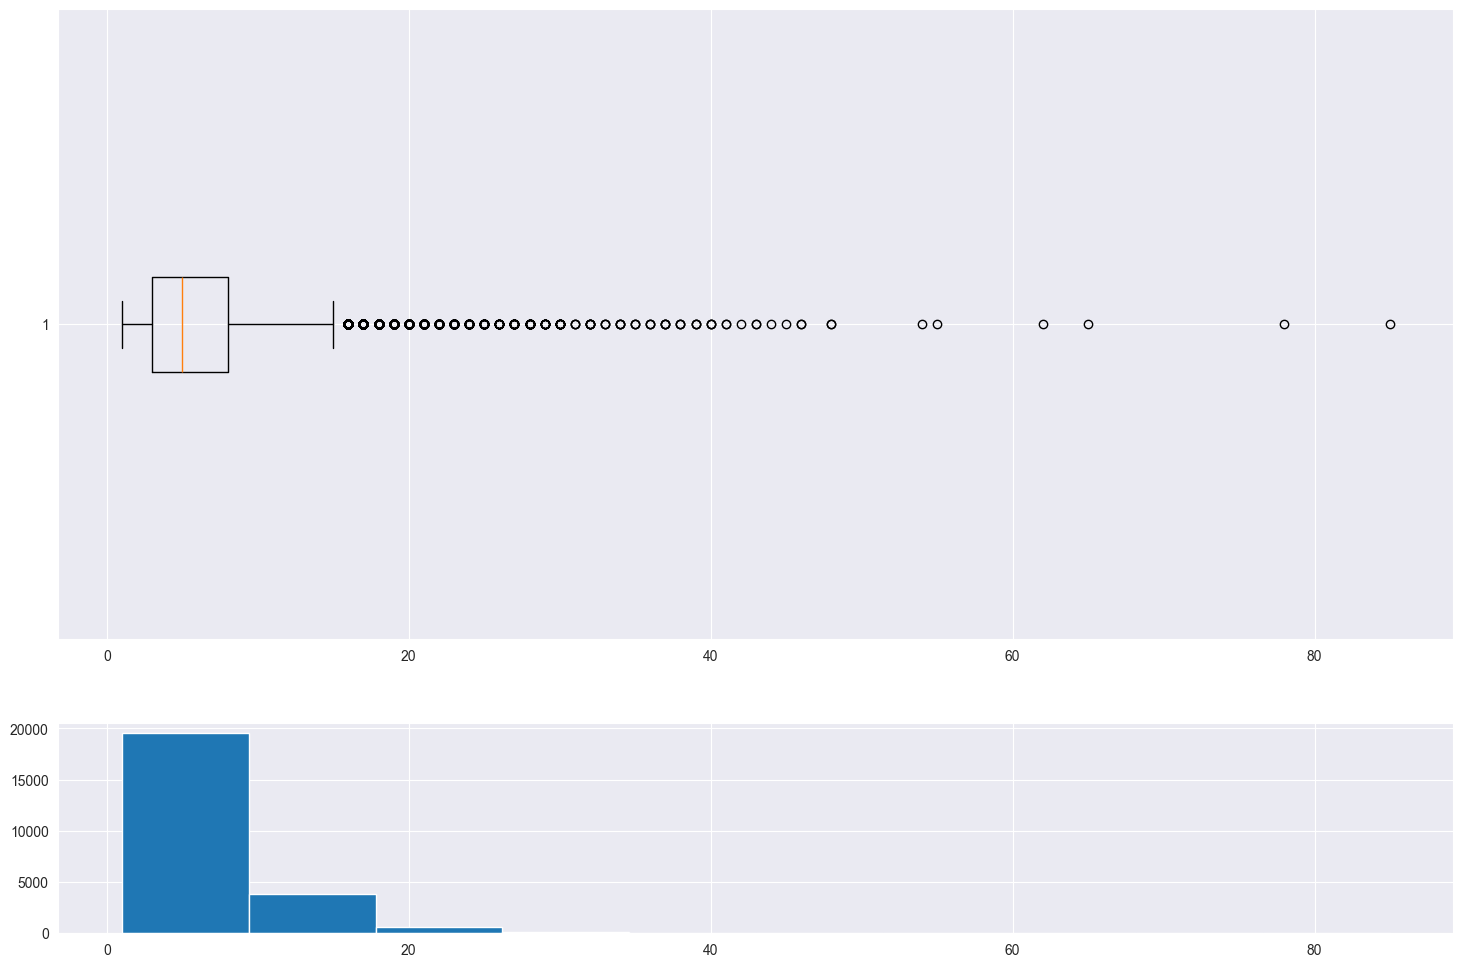

In [23]:
### UNI-VARIATE ANALYSIS
# 2. NumBuildings -> boxplots, prob density
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(property_data["NumBuildings"].dropna(), vert=False, meanline=True)
ax2.hist(property_data["NumBuildings"].dropna())
plt.show()

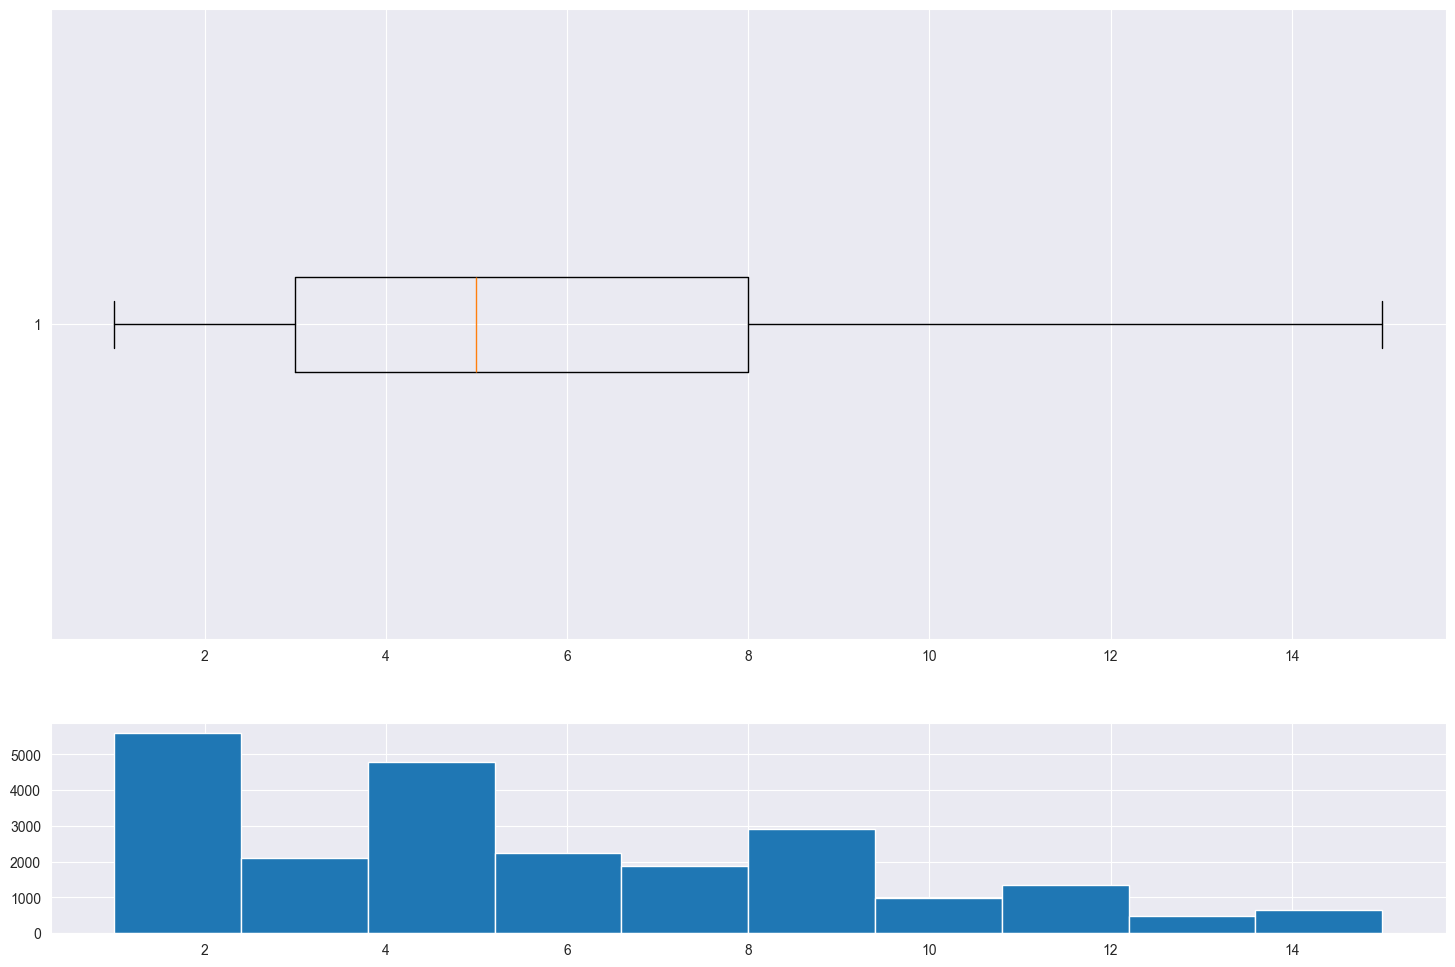

In [24]:
### UNI-VARIATE ANALYSIS
# 2. NumBuildings -> boxplots, prob density
# Clearly there is an outlier in numBuildings. Let's remove that to see the same plots again 
# property_data["NumBuildings"].argmax()

col = "NumBuildings"

Q1 = property_data[col].quantile(0.25)
Q3 = property_data[col].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

property_data = property_data[(property_data[col] >= lower_bound) & (property_data[col] <= upper_bound)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(property_data[col].dropna(), vert=False, meanline=True)
ax2.hist(property_data[col].dropna(), bins=10)
plt.show()

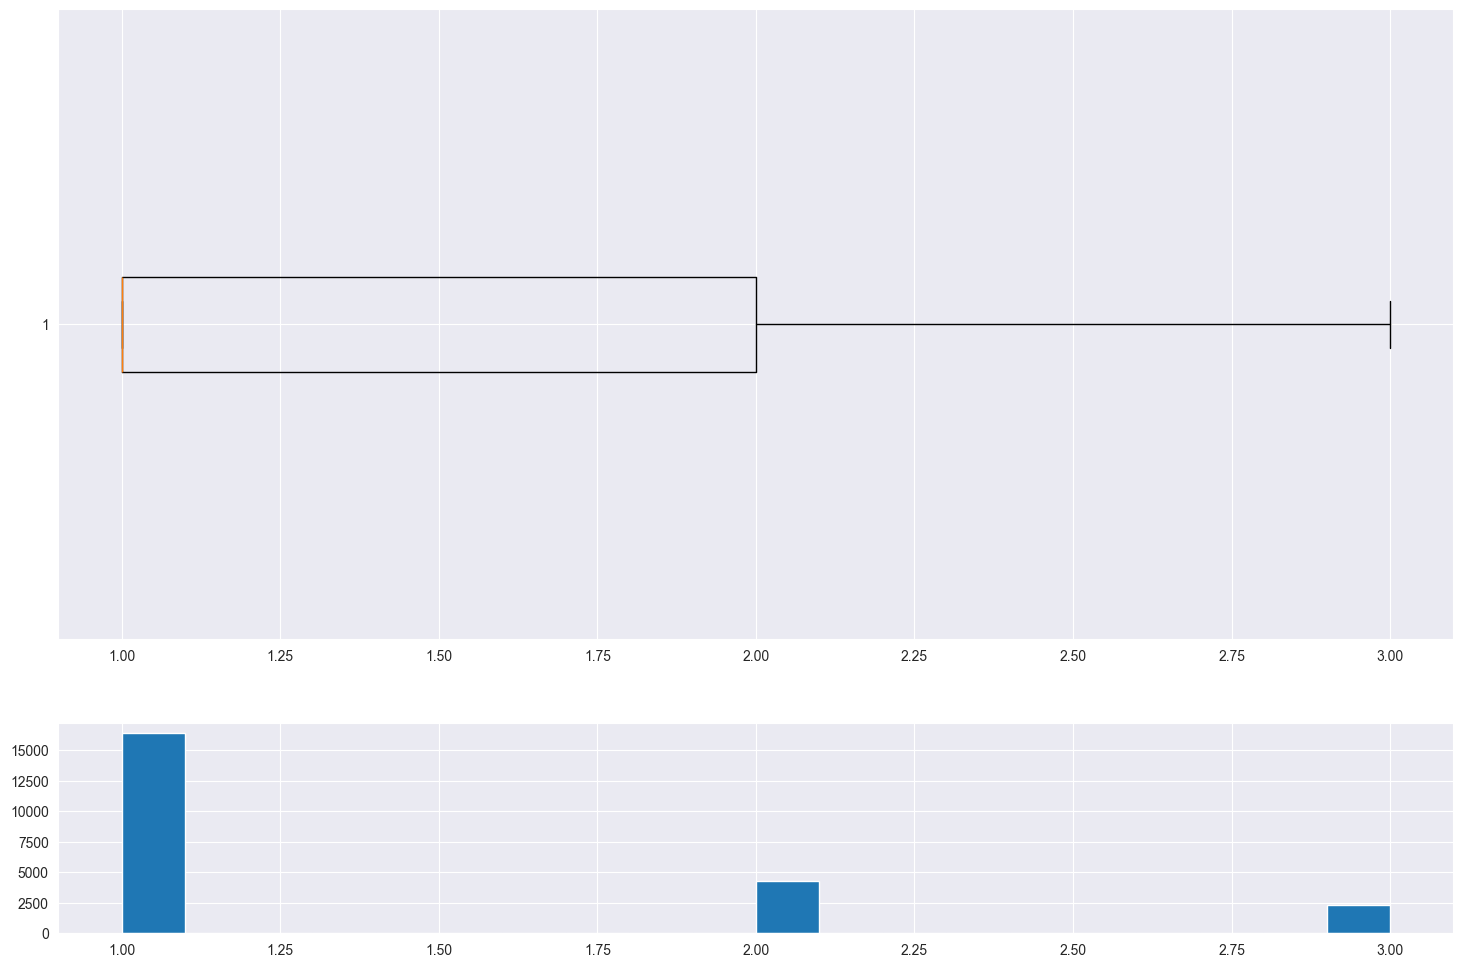

In [25]:
### UNI-VARIATE ANALYSIS
# 3. NumFloors -> boxplots
data = property_data["NumFloors"].dropna()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(data.dropna(), vert=False, meanline=True)
ax2.hist(data.dropna(), bins=20)
plt.show()

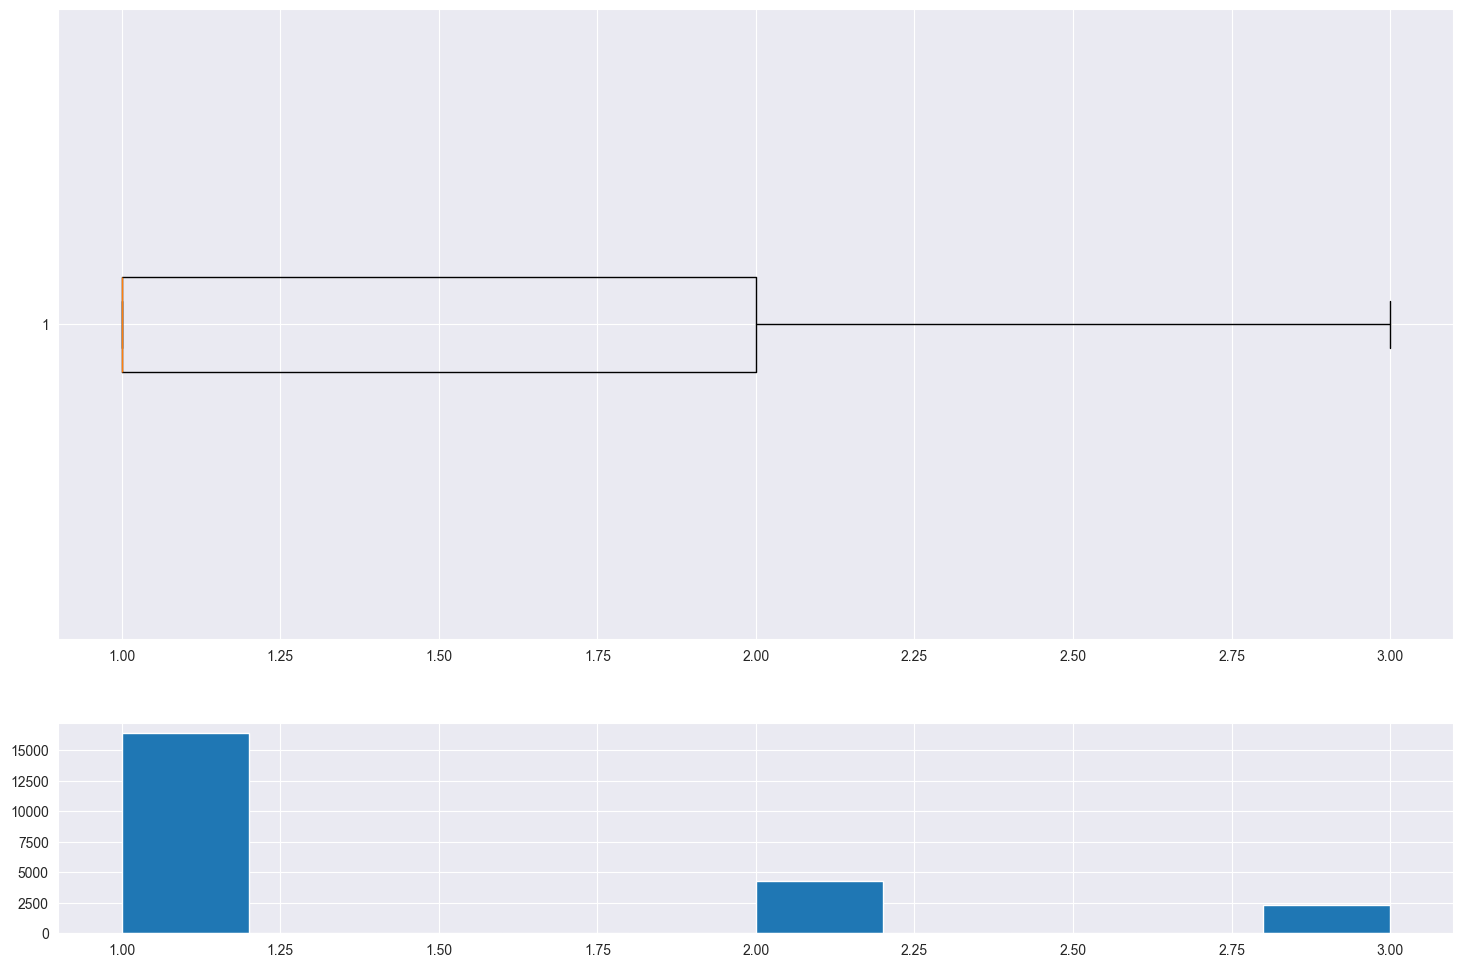

In [26]:
### UNI-VARIATE ANALYSIS
# 3. NumFloors -> boxplots
# Calculate the IQR (Interquartile Range) and remove the outliers in property data based on NetRentableSqFt
col = "NumFloors"

Q1 = property_data[col].quantile(0.25)
Q3 = property_data[col].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

property_data = property_data[(property_data[col] >= lower_bound) & (property_data[col] <= upper_bound)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(property_data[col].dropna(), vert=False, meanline=True)
ax2.hist(property_data[col].dropna())
plt.show()

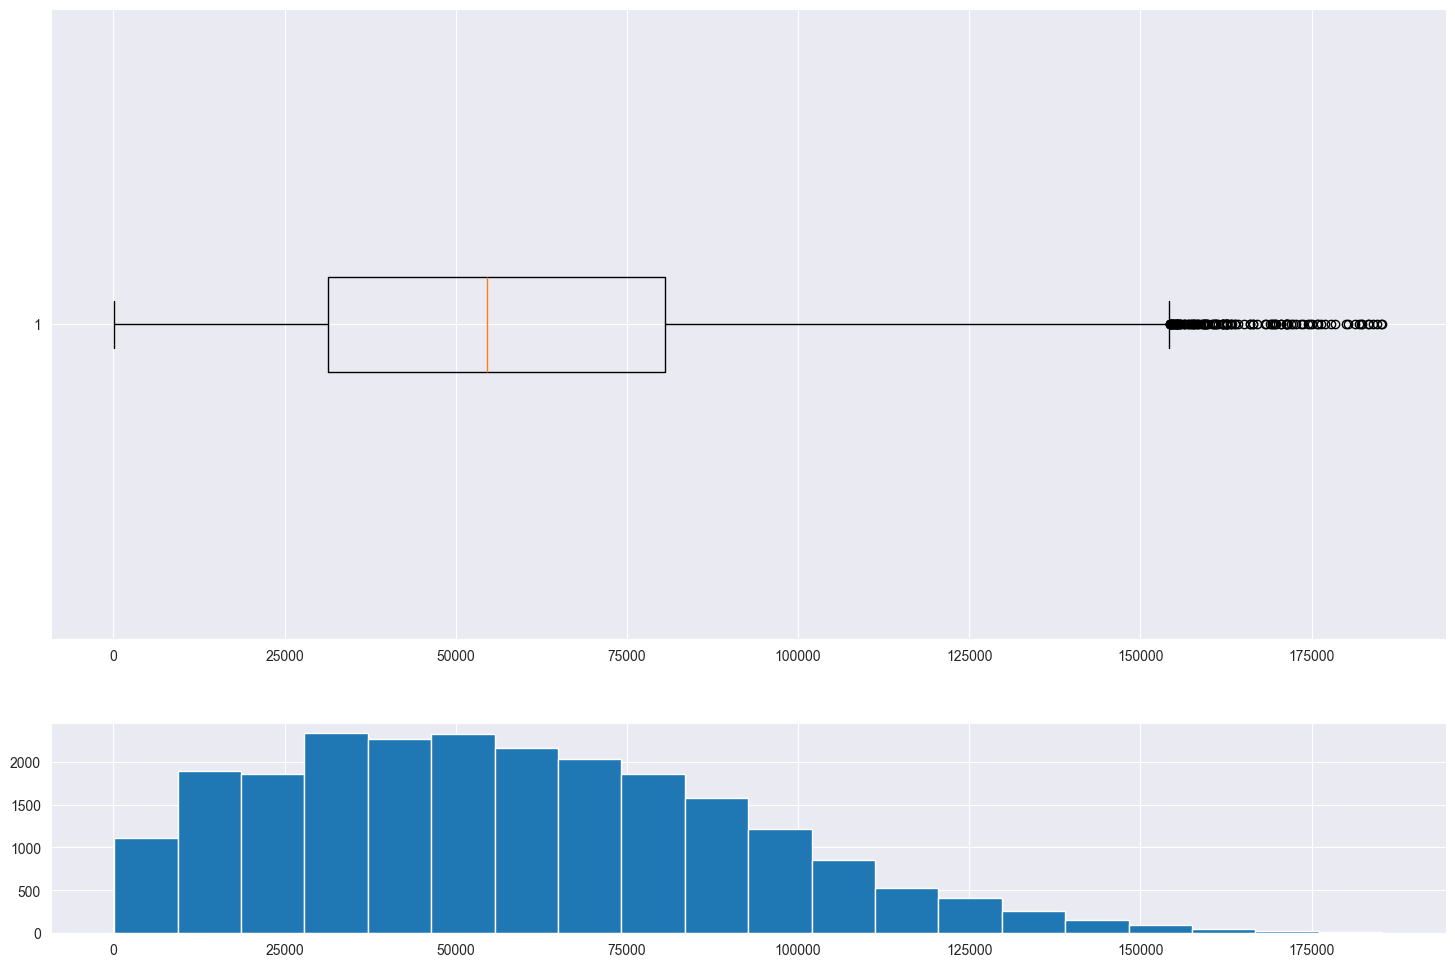

In [27]:
### UNI-VARIATE ANALYSIS
# 4. TotalSqFt -> boxplots, prob dencsity

data = property_data["TotalSqFt"].dropna()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})
ax1.boxplot(data.dropna(), vert=False, meanline=True)
ax2.hist(data.dropna(), bins=20)
plt.show()

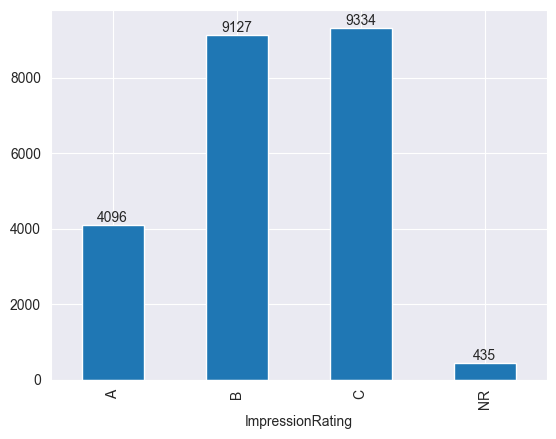

In [28]:
### UNI-VARIATE ANALYSIS
# 5. ImpressionRating -> Bar Chart
# Define the custom order for the categories
custom_order = ['A', 'B', 'C', 'NR']
data = property_data["ImpressionRating"].dropna().value_counts().reindex(custom_order)
data.plot(kind='bar')
# Add counts as labels on the bars
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

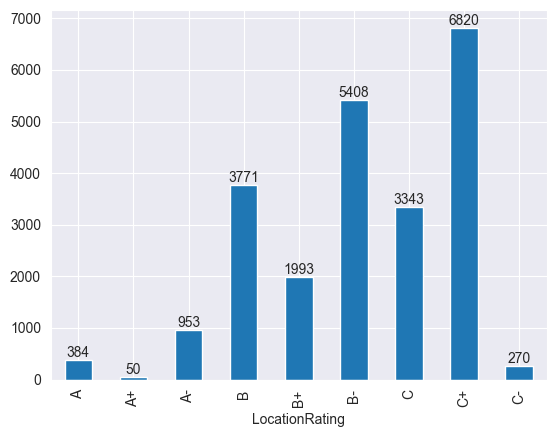

In [29]:
### UNI-VARIATE ANALYSIS
# 6. LocationRating -> Bar Chart
# custom_order = ['A', 'B', 'C', 'NR']
data = property_data["LocationRating"].dropna().value_counts().sort_index()
data.plot(kind='bar')
# Add counts as labels on the bars
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

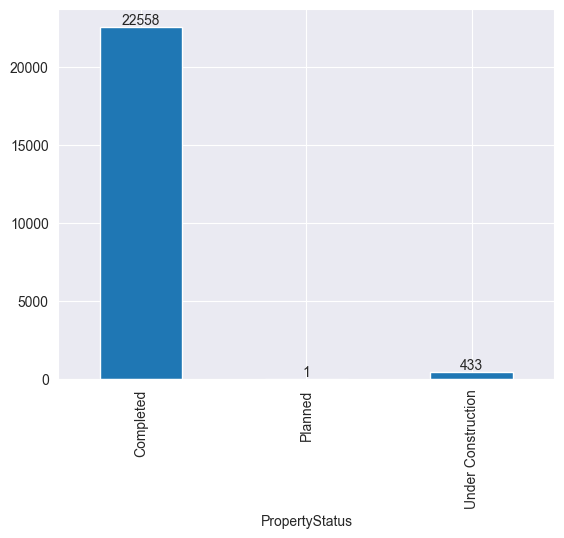

In [30]:
### UNI-VARIATE ANALYSIS
# 7. PropertyStatus -> Bar Chart
data = property_data["PropertyStatus"].dropna().value_counts().sort_index()
data.plot(kind='bar')
# Add counts as labels on the bars
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

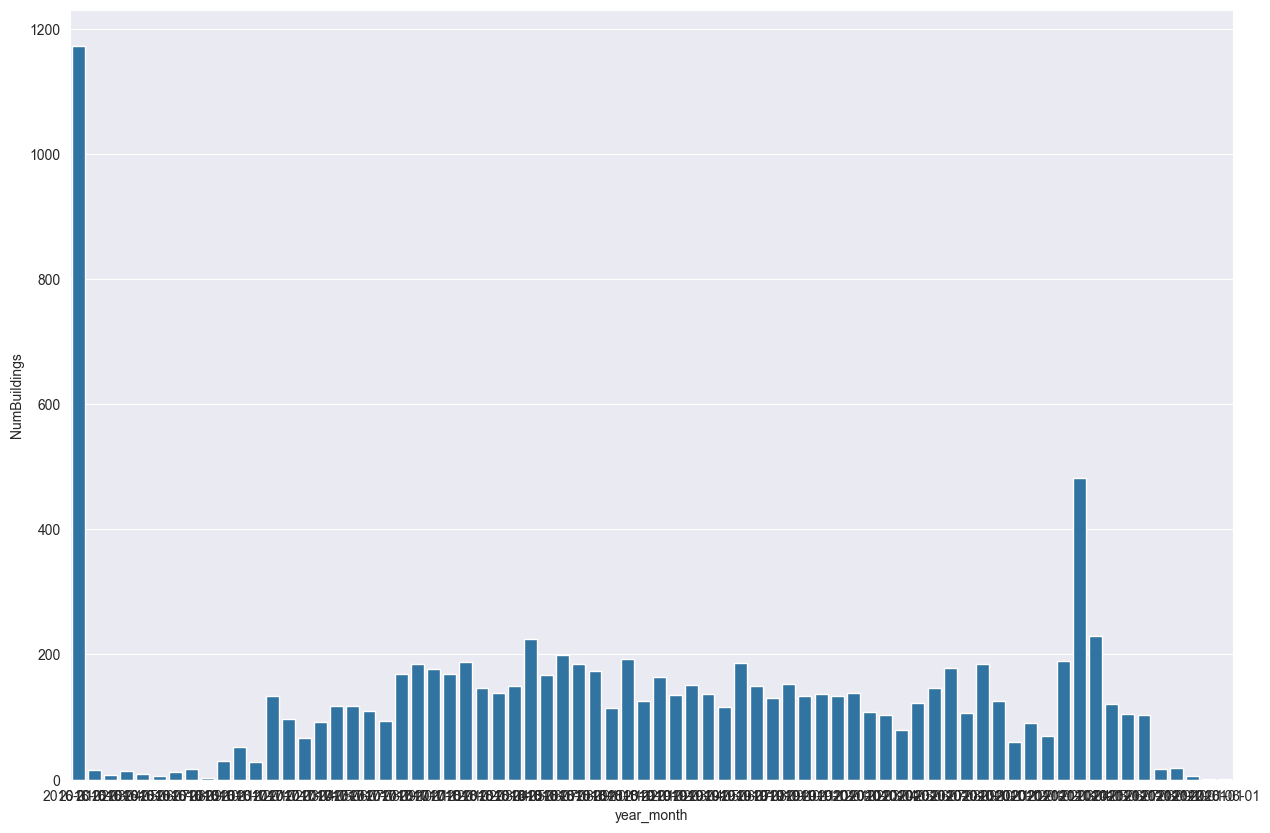

In [55]:
### UNI-VARIATE ANALYSIS
# 8. NumBuildings -> Bar Chart
# Define the custom order for the categories
plt.figure(figsize=(15, 10))
property_data['year_month'] = property_data['CompletionDate'].dt.strftime('%Y-%m-01')
# property_data['year_month'] = pd.to_datetime(property_data['year_month'], format="%Y=%m-%d")
data = property_data[property_data["CompletionDate"]>="2016-01-01"][["NumBuildings", "year_month"]].groupby("year_month").sum().reset_index()
sns.barplot(x='year_month', y='NumBuildings', data=data)
plt.show()

In [ ]:
### BI-VARIATE ANALYSIS
# 1. NetRentableSqFt over time (line), by state (bar chart), with TotalSqFt (scatter) 
# after start of business in 1972
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 3, 3]})
fig.set_size_inches(25, 20)

# NetRentableSqFt over time
data = property_data.dropna().copy()
data['year_week'] = property_data['CompletionDate'].dt.strftime('%Y-%U')
data = data.sort_values(by=["CompletionDate"], ascending=True)
grouped = data[["NetRentableSqFt", "Year"]].groupby(["Year"]).sum()
ax1.plot(grouped.index, grouped.values, linestyle='-')
ax1.grid(True)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Net Rentable SqFt Added', fontsize=20)
ax1.set_title('Net Rentable SqFt Added by Year', fontsize=24)


# NetRentableSqFt by State
data = property_data.dropna().copy()
grouped = data[["NetRentableSqFt", "State"]].groupby(["State"]).sum()
grouped.plot(kind='bar', y='NetRentableSqFt', legend=False, ax=ax2)
ax2.set_xlabel('State', fontsize=20)
ax2.set_ylabel('Net Rentable SqFt', fontsize=20)
ax2.set_title('Net Rentable SqFt by State', fontsize=24)

# NetRentableSqFt vs TotalSqFt scatter
data = property_data.dropna().copy()
ax3.scatter(property_data["NetRentableSqFt"], property_data["TotalSqFt"])
ax3.set_xlabel('NetRentableSqFt', fontsize=20)
ax3.set_ylabel('TotalSqFt', fontsize=20)
ax3.set_title('Net Rentable SqFt vs Total SqFt', fontsize=24)
plt.tight_layout()
plt.show()

In [ ]:
### BI-VARIATE ANALYSIS
# 2. ImpressionRating vs LocationRating Heat Map
# Create a DataFrame from the sample data
data = property_data[["ImpressionRating", "LocationRating"]]

# Crosstab to get counts
count_matrix = pd.crosstab(data['ImpressionRating'], data['LocationRating'])

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(count_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True, square=True)

plt.title('Heatmap of Counts for Two Categorical Columns')
plt.show()

In [ ]:
### BI-VARIATE ANALYSIS
# 3. 52week avg RentableSqFt relation with PSA Stock Price 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 3]})

# NetRentableSqFt over time
data = property_data[property_data["CompletionDate"] >= "1980-01-01"].dropna().copy()
data = data.sort_values(by=["CompletionDate"], ascending=True)
grouped = data[["NetRentableSqFt", "Year"]].dropna(subset=["NetRentableSqFt"]).groupby(["Year"]).sum()
grouped = grouped.reset_index()
# grouped["year"] = grouped["Year"].astype(str) + "-" + grouped["quarter"].astype(str)
ax1.plot(grouped["Year"], grouped["NetRentableSqFt"], linestyle='-')
ax1.set_xlabel('Year-Quarter', fontsize=20)
ax1.set_ylabel('Net Rentable SqFt Added', fontsize=20)
ax1.set_title('Net Rentable SqFt Added by Year', fontsize=24)


# Weekly Moving Avg. of PSA Adj Close
spt_adj_close = spt.get_adj_close("PSA","1972-01-01", "2022-12-31")
spt_adj_close["Adjusted Close"] = spt_adj_close['Adjusted Close'].rolling(window=252).mean()
# spt_adj_close = spt_adj_close.loc[spt_adj_close['Adjusted Close'].isin(grouped.Year.values), :]
ax2.plot(spt_adj_close.index, spt_adj_close.values, linestyle='-')
ax2.grid(True)
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel('52 week moving_avg', fontsize=20)
ax2.set_title('52 week moving_avg of Adj Close of PSA', fontsize=24)

plt.tight_layout() 
plt.show()

### The plot above shows there isn't any visible relationship between Rentable SqFt growth and Stock Price of Public Storage

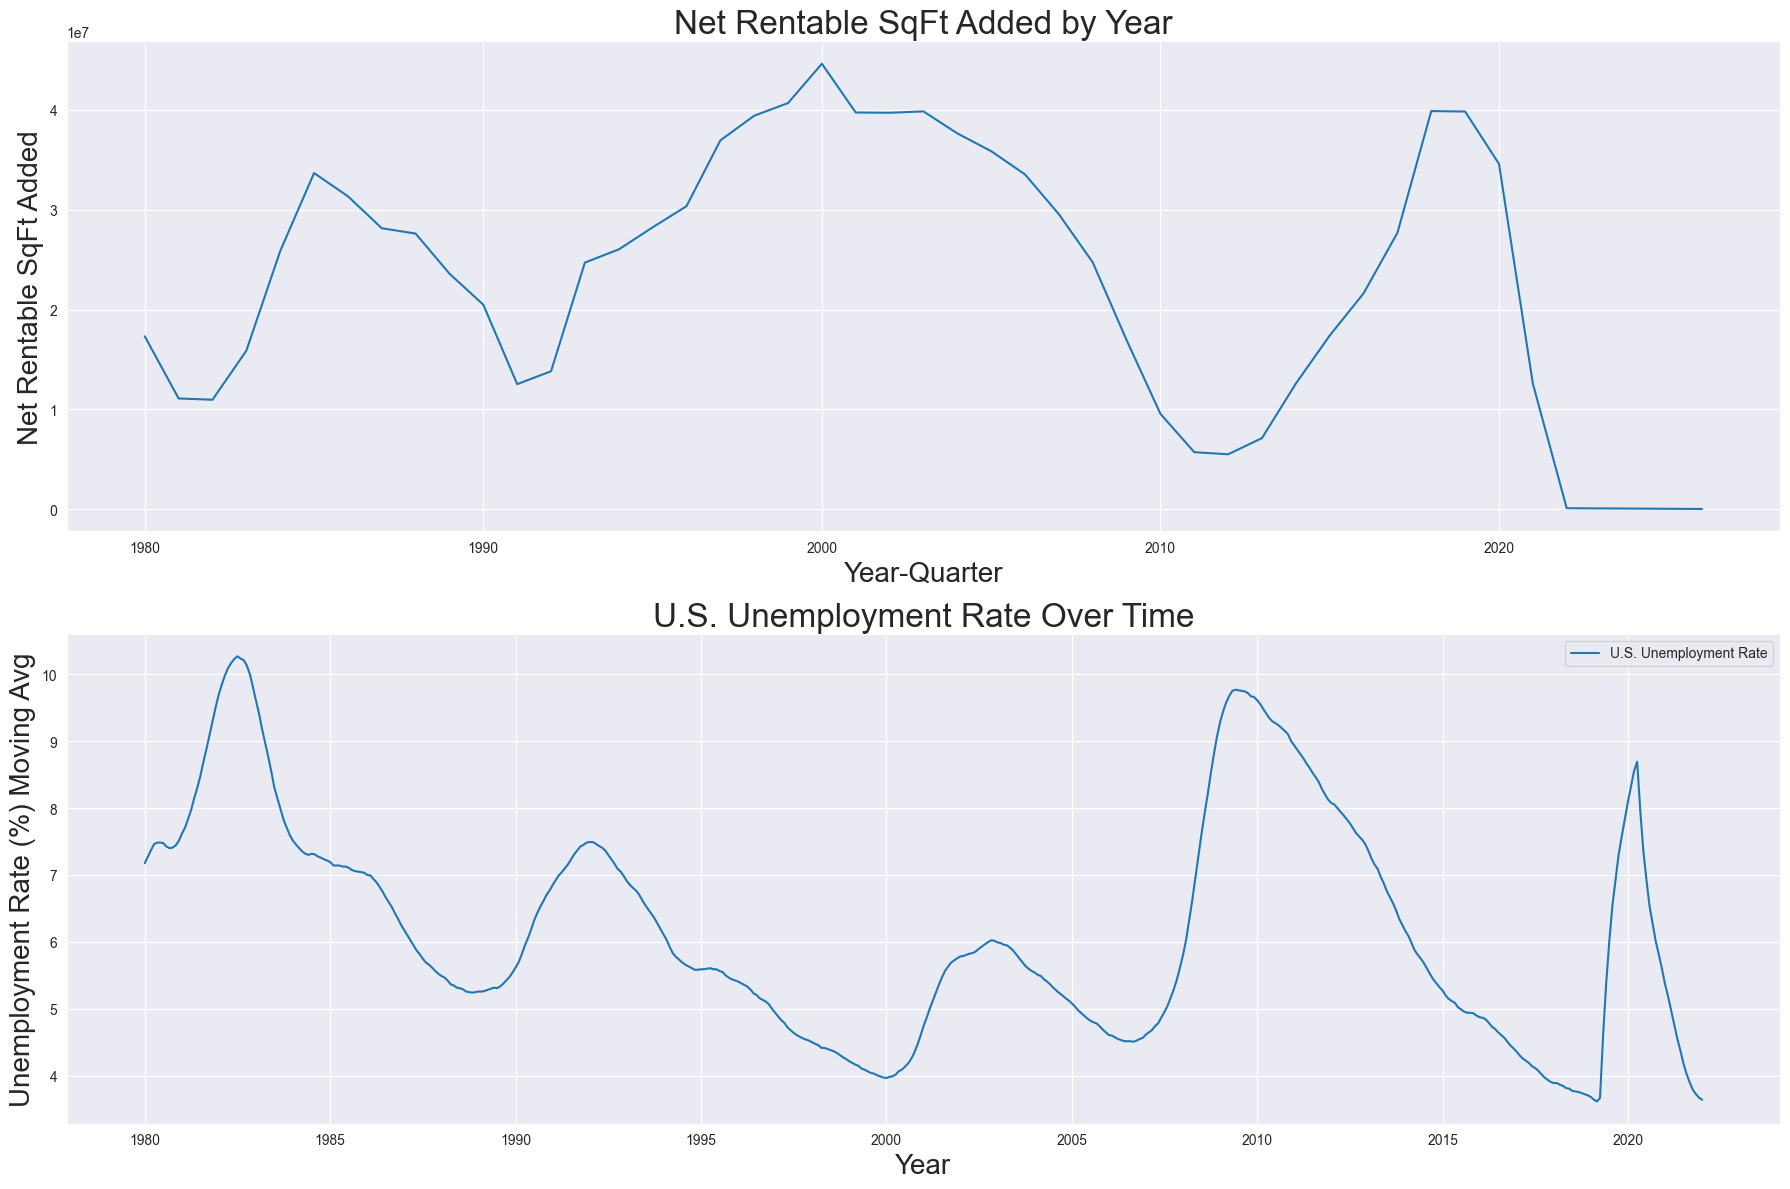

In [56]:
### BI-VARIATE ANALYSIS
# 3. 52week avg RentableSqFt relation with Unemployment Rate 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 3]})

# NetRentableSqFt over time
data = property_data[property_data["CompletionDate"] >= "1980-01-01"].dropna().copy()
data = data.sort_values(by=["CompletionDate"], ascending=True)
grouped = data[["NetRentableSqFt", "Year"]].dropna(subset=["NetRentableSqFt"]).groupby(["Year"]).sum()
grouped = grouped.reset_index()
ax1.plot(grouped["Year"], grouped["NetRentableSqFt"], linestyle='-')
ax1.set_xlabel('Year-Quarter', fontsize=20)
ax1.set_ylabel('Net Rentable SqFt Added', fontsize=20)
ax1.set_title('Net Rentable SqFt Added by Year', fontsize=24)

# Define the date range (adjust as needed)
start_year = 1970
end_year = 2022

# Fetch historical unemployment rate data from Yahoo Finance
unemployment_rate_data = pd.read_csv("input_data/unemployment_rate_1970_to_2022.csv")
unemployment_rate_data.year_month = pd.to_datetime(unemployment_rate_data.year_month, format="%m/%d/%y")
unemployment_rate_data["YearlyMovingAvgUnemploymentRate"] = unemployment_rate_data.UnemploymentRate.rolling(window=12).mean()
unemployment_rate_data = unemployment_rate_data[unemployment_rate_data["year_month"] >= "1980-01-01"]
unemployment_rate_data.sort_values("year_month", ascending=True)

# Plot the unemployment rate over time
ax2.plot(unemployment_rate_data["year_month"], unemployment_rate_data['YearlyMovingAvgUnemploymentRate'], label='U.S. Unemployment Rate', linestyle='-')
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel('Unemployment Rate (%) Moving Avg', fontsize=20)
ax2.set_title('U.S. Unemployment Rate Over Time', fontsize=24)
ax2.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()

### The plot above shows there is negative correlation between Rentable SqFt Growth and UnEmployment Rate

In [ ]:
### BI-VARIATE ANALYSIS
# 4. 52week avg RentableSqFt relation with Comsumer Pricing Index
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 3]})

# NetRentableSqFt over time
data = property_data[property_data["CompletionDate"] >= "1980-01-01"].dropna().copy()
data = data.sort_values(by=["CompletionDate"], ascending=True)
grouped = data[["NetRentableSqFt", "Year"]].dropna(subset=["NetRentableSqFt"]).groupby(["Year"]).sum()
grouped = grouped.reset_index()
# grouped["year"] = grouped["Year"].astype(str) + "-" + grouped["quarter"].astype(str)
ax1.plot(grouped["Year"], grouped["NetRentableSqFt"], linestyle='-')
ax1.set_xlabel('Year-Quarter', fontsize=20)
ax1.set_ylabel('Net Rentable SqFt Added', fontsize=20)
ax1.set_title('Net Rentable SqFt Added by Year', fontsize=24)

# Fetch historical unemployment rate data from Yahoo Finance
cpi_data = pd.read_csv("input_data/cpi_data_1970_to_2022.csv", index_col=0)
cpi_data["year_month"] = pd.to_datetime(cpi_data.index, format="%Y-%m-%d")
cpi_data["CPI"] = cpi_data.CPI.rolling(window=12).mean()
cpi_data = cpi_data[cpi_data["year_month"] >= "1980-01-01"]
cpi_data.sort_values("year_month", ascending=True)

# Plot the unemployment rate over time
# plt.figure(figsize=(12, 6))
ax2.plot(cpi_data["year_month"], cpi_data['CPI'], label='Consumer Pricing Index', linestyle='-')
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel('CPI 52 week Moving Avg', fontsize=20)
ax2.set_title('CPI 52 week Moving Avg Over Time', fontsize=24)
ax2.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()

### The plot above shows there is no noticeable relationship between Rentable SqFt Growth and CPI

In [ ]:
### BI-VARIATE ANALYSIS
# 4. 52week avg RentableSqFt relation with Comsumer Pricing Index
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 3]})

# NetRentableSqFt over time
data = property_data[property_data["CompletionDate"] >= "1980-01-01"].dropna().copy()
data = data.sort_values(by=["CompletionDate"], ascending=True)
grouped = data[["NetRentableSqFt", "Year"]].dropna(subset=["NetRentableSqFt"]).groupby(["Year"]).sum()
grouped = grouped.reset_index()
# grouped["year"] = grouped["Year"].astype(str) + "-" + grouped["quarter"].astype(str)
ax1.plot(grouped["Year"], grouped["NetRentableSqFt"], linestyle='-')
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Net Rentable SqFt Added', fontsize=20)
ax1.set_title('Net Rentable SqFt Added by Year', fontsize=24)

# Fetch historical unemployment rate data from Yahoo Finance
ltrate_data = pd.read_csv("input_data/long-term-rates-1965_to_2023.csv")
ltrate_data["Date"] = pd.to_datetime(ltrate_data["Date"], format="%Y-%m-%d")
ltrate_data["year_month"] = ltrate_data["Date"].dt.strftime('%Y-%m')
ltrate_data["LT COMPOSITE (>10 Yrs)"] = pd.to_numeric(ltrate_data["LT COMPOSITE (>10 Yrs)"], errors='coerce')
ltrate_group_avg_data = ltrate_data[["LT COMPOSITE (>10 Yrs)", "year_month"]].groupby("year_month").mean().reset_index()
ltrate_group_avg_data["year_month"] = pd.to_datetime(ltrate_group_avg_data["year_month"], format="%Y-%m") 
ltrate_group_avg_data = ltrate_group_avg_data[ltrate_group_avg_data["year_month"] >= "1980-01-01"]
ltrate_group_avg_data.sort_values("year_month", ascending=True)

# Plot the unemployment rate over time
# plt.figure(figsize=(12, 6))
ax2.plot(ltrate_group_avg_data["year_month"], ltrate_group_avg_data["LT COMPOSITE (>10 Yrs)"], label='LT COMPOSITE (>10 Yrs) Moving Avg', linestyle='-')
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel('LT COMPOSITE (>10 Yrs) Moving Avg', fontsize=20)
ax2.set_title('LT COMPOSITE (>10 Yrs) Avg Over Time', fontsize=24)
ax2.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()

### Here we can infer that LT composite yield - and as a consequence mortgage rates - were going towards historic lows and leading to more housing sales which could have provided opportunity for adding more rential sqft. But ther is no evidence for relationship between rental sqft and LT rates when they were actually going up except for data from 2020 to 2022. 

In [ ]:
### BI-VARIATE ANALYSIS
# 4. 52week avg RentableSqFt relation with US population
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 3]})

# NetRentableSqFt over time
data = property_data[property_data["CompletionDate"] >= "1980-01-01"].dropna().copy()
data = data.sort_values(by=["CompletionDate"], ascending=True)
grouped = data[["NetRentableSqFt", "Year"]].dropna(subset=["NetRentableSqFt"]).groupby(["Year"]).sum()
grouped = grouped.reset_index()
# grouped["year"] = grouped["Year"].astype(str) + "-" + grouped["quarter"].astype(str)
ax1.plot(grouped["Year"], grouped["NetRentableSqFt"], linestyle='-')
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Net Rentable SqFt Added', fontsize=20)
ax1.set_title('Net Rentable SqFt Added by Year', fontsize=24)

# Fetch historical unemployment rate data from Yahoo Finance
pop = pd.read_csv("input_data/population_1950_to_2037_projections/united-states-population-2023-11-07.csv")
pop["date"] = pd.to_datetime(pop["date"], format="%Y-%m-%d")
pop["year_month"] = pop["date"].dt.strftime('%Y-%m')
pop["10yr_growth_rate"] = pop['Population'] / pop['Population'].shift(10) * 100 - 100
# pop["Annual_Percent_Change"] = pd.to_numeric(pop["Annual_Percent_Change"], errors='coerce')

pop["year_month"] = pd.to_datetime(pop["year_month"], format="%Y-%m") 
pop.sort_values("year_month", ascending=True)
pop = pop[pop["year_month"] >= "1980-01-01"]

# Plot the unemployment rate over time
# plt.figure(figsize=(12, 6))
ax2.plot(pop["year_month"], pop["10yr_growth_rate"], label='10 yr Population Growth Rate', linestyle='-')
ax2.set_xlabel('Year', fontsize=20)
ax2.set_ylabel('Population_Growth_Rate', fontsize=20)
ax2.set_title('10 Yr Population_Growth_Rate Over Time', fontsize=24)
ax2.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()

In [ ]:
pop[" Population"]

In [ ]:
ltrate_data["Date"].min()